Simple Pendulum Hamiltonian:
$$ H(p, q) = \frac{p^2}{2} - \omega_0^2 \cos q \; \Longleftrightarrow \; p = \pm \sqrt{2 (h + \omega_0^2 \cos q)}, $$
with $V_0 = \omega_0^2$.
Choosing $V_0 = 1$, then
$$ h = H(p, q) = \frac{p^2}{2} - \cos q, $$
$$ p = \pm \sqrt{2 (h + \cos q)}, $$
and
$$ q = \arccos \left( \frac{p^2}{2} - h \right). $$

In [1]:
import numpy as np
import scipy as sp
import scipy.integrate as sp_int
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from functools import partial

In [2]:
#Implementation by @GBy: https://stackoverflow.com/questions/26911898/matplotlib-curve-with-arrow-ticks

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8],
    arrowstyle='-|>', arrowsize=1, transform=None):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: Line2D object as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if not isinstance(line, mlines.Line2D):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line.get_xdata(), line.get_ydata()

    arrow_kw = {
        "arrowstyle": arrowstyle,
        "mutation_scale": 10 * arrowsize,
    }

    color = line.get_color()
    use_multicolor_lines = isinstance(color, np.ndarray)
    if use_multicolor_lines:
        raise NotImplementedError("multicolor lines not supported")
    else:
        arrow_kw['color'] = color

    linewidth = line.get_linewidth()
    if isinstance(linewidth, np.ndarray):
        raise NotImplementedError("multiwidth lines not supported")
    else:
        arrow_kw['linewidth'] = linewidth

    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows

#SAMPLE CODE
'''
y = np.linspace(0, 100, 200)
x = np.cos(y/5.)

fig, ax = plt.subplots(1, 1)
# print the line and the markers in seperate steps
line, = ax.plot(x, y, 'k-')
add_arrow_to_line2D(ax, line, arrow_locs=np.linspace(0., 1., 200),
                    arrowstyle='->')
''';

In [3]:
h = lambda q, p: p**2 / 2 - np.cos(q)
p = lambda q, h: np.sqrt(2 * (h + np.cos(q)))
q = lambda p, h: np.arccos(p**2 / 2 - h)

# Exercise 1:

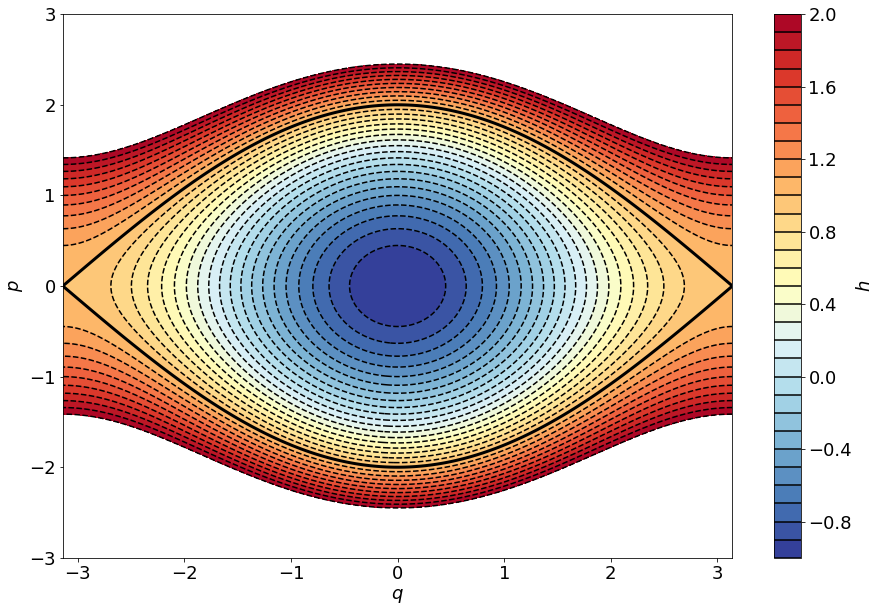

In [4]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

q_space = np.linspace(-np.pi, np.pi, 1000)
p_space = np.linspace(-3, 3, 1000)

Q_space, P_space = np.meshgrid(q_space, p_space)
H = h(Q_space, P_space)

energy_levels = np.linspace(-1, 2, 31)
cs = ax.contour(q_space, p_space, H, levels=energy_levels, colors='black', linestyles='--')
i_separatrix = np.where(energy_levels==1)[0][0]
cs.collections[i_separatrix].set_linestyle('-')
cs.collections[i_separatrix].set_linewidth(3)
csf = ax.contourf(q_space, p_space, H, levels=energy_levels, cmap=plt.cm.RdYlBu_r)

cbar = fig.colorbar(csf)
cbar.ax.set_ylabel('$h$')
cbar.add_lines(cs)

#PLOT CENTER PATH:
#h_center = -0.98
#q_min, q_max = -q(0, h_center), q(0, h_center)
#center_q = np.linspace(q_min, q_max, 100)
#center_path_1, = ax.plot(center_q, p(center_q, h_center))
#FINISH AFTER CONSULT WITH PROFESSOR

ax.set_xlabel('$q$')
ax.set_ylabel('$p$')

fig.savefig('ex1_phase_plot_center.png', bbox_inches='tight')

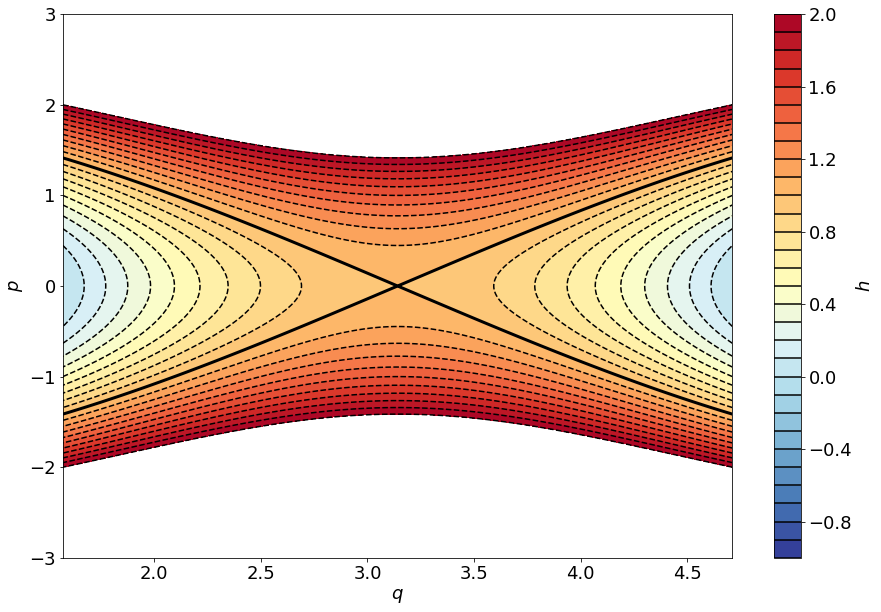

In [5]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

q_space = np.linspace(np.pi/2, 3/2 * np.pi, 1000)
p_space = np.linspace(-3, 3, 1000)

Q_space, P_space = np.meshgrid(q_space, p_space)
H = h(Q_space, P_space)

energy_levels = np.linspace(-1, 2, 31)
cs = ax.contour(q_space, p_space, H, levels=energy_levels, colors='black', linestyles='--')
i_separatrix = np.where(energy_levels==1)[0][0]
cs.collections[i_separatrix].set_linestyle('-')
cs.collections[i_separatrix].set_linewidth(3)
csf = ax.contourf(q_space, p_space, H, levels=energy_levels, cmap=plt.cm.RdYlBu_r)

cbar = fig.colorbar(csf)
cbar.ax.set_ylabel('$h$')
cbar.add_lines(cs)

ax.set_xlabel('$q$')
ax.set_ylabel('$p$')

fig.savefig('ex1_phase_plot_crossing.png', bbox_inches='tight')

# Exercise 2:

Given the Hamiltonian $ H(q, p) = \frac{p^2}{2} - \cos q, $
then the Hamilton equations of motion take the form
$$ \dot{q} = \frac{\partial H}{\partial p} = p, $$
y
$$ \dot{p} = -\frac{\partial H}{\partial q} = - \sin q. $$

Let $\vec{y}(t) = \begin{pmatrix} q(t) \\ p(t) \end{pmatrix}$.

In [6]:
hamiltonEquations = lambda t, y: (y[1], - np.sin(y[0]))
t_span = (0, 30)
energy_levels_under_1 = np.sort(np.unique(np.concatenate([np.linspace(-1, 1, 6)[:-1], [0.9]])))
energy_levels_over_1 = np.sort(np.unique(np.concatenate([np.linspace(1, 2, 6)[1:], [1.05]])))
results_under_1 = []
for energy in energy_levels_under_1:
    q_init = q(0, energy)
    p_init = 0
    res = sp_int.solve_ivp(hamiltonEquations, t_span, (q_init, p_init), max_step = 0.1)
    results_under_1 += [(res.t, res.y)]

res = sp_int.solve_ivp(hamiltonEquations, t_span, (-np.pi, 0), max_step = 0.1)
result_at_1 = (res.t, res.y)
    
results_over_1_pos = []
results_over_1_neg = []
for energy in energy_levels_over_1:
    q_init = -np.pi
    p_init = p(q_init, energy)
    res = sp_int.solve_ivp(hamiltonEquations, t_span, (q_init, p_init), max_step = 0.1)
    results_over_1_pos += [(res.t, res.y)]
    res = sp_int.solve_ivp(hamiltonEquations, (30, 0), (q_init, -p_init), max_step = 0.1) #Modiffied t_span, due to trajectory inversion
    results_over_1_neg += [(res.t, res.y)]

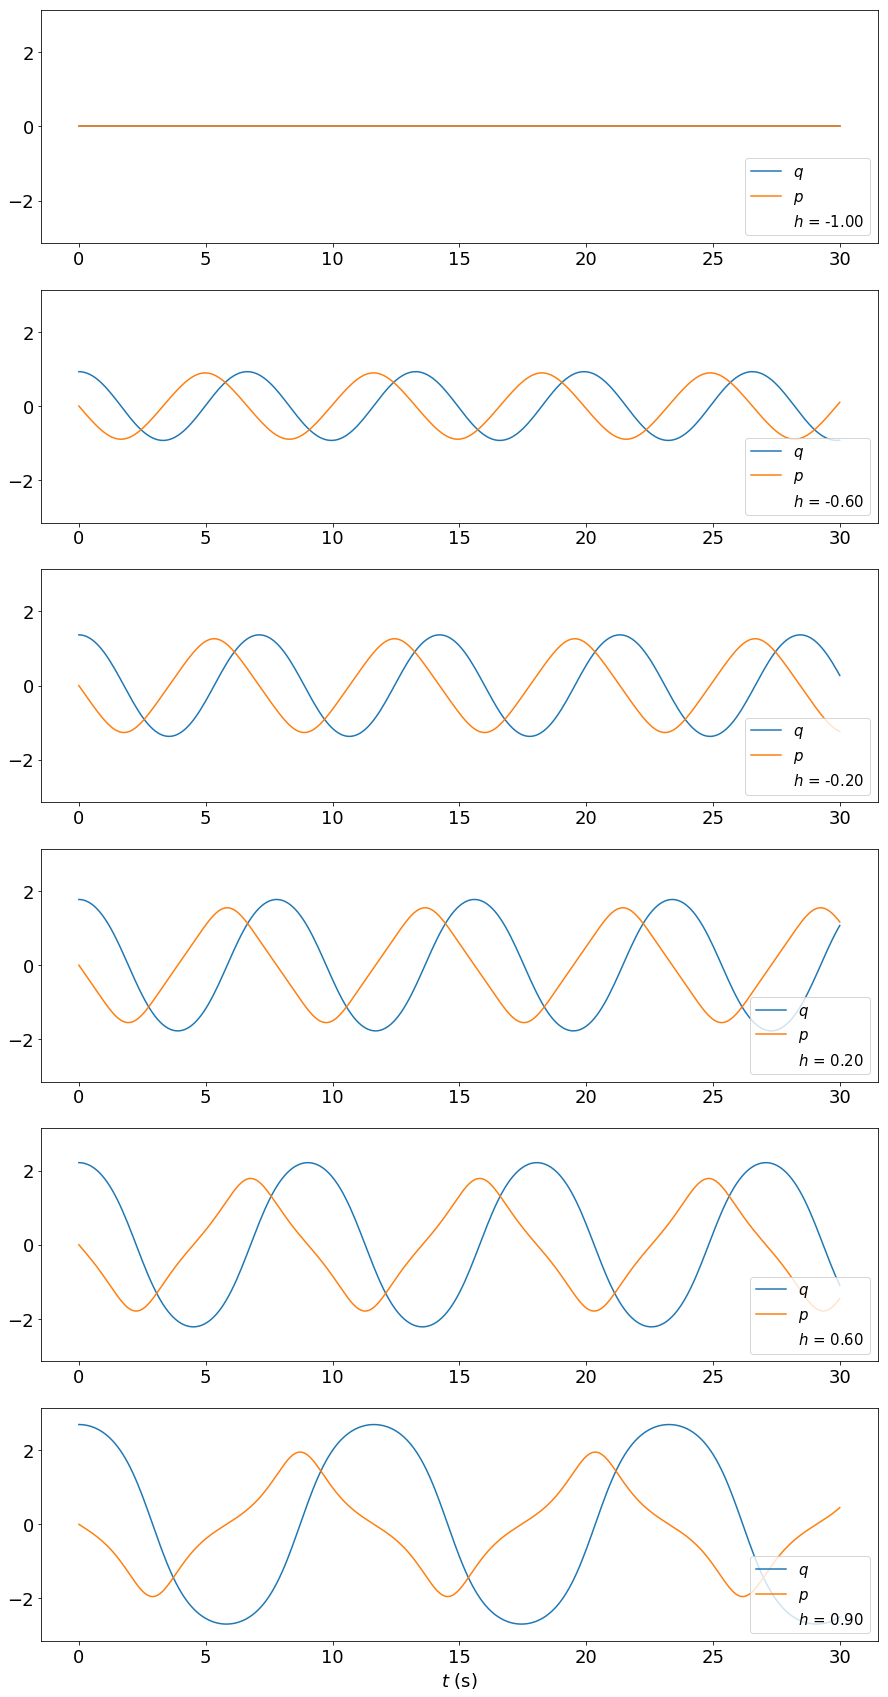

In [7]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(15,30))
for i, (energy, result) in enumerate(zip(energy_levels_under_1, results_under_1)):
    t, y = result
    ax = fig.add_subplot(len(results_under_1), 1, i + 1)
    q_plot = ax.plot(t, y[0], label='$q$')
    p_plot = ax.plot(t, y[1], label='$p$')
    plt.plot([], [], ' ', label="$h$ = %.2f" % energy)
    ax.legend( loc='lower right', fontsize='small')
    
    ax.set_ylim(-np.pi, np.pi)
    if i == len(results_under_1) - 1:
        ax.set_xlabel('$t$ (s)')
fig.savefig('ex2_qp_plot_under1.png', bbox_inches='tight')

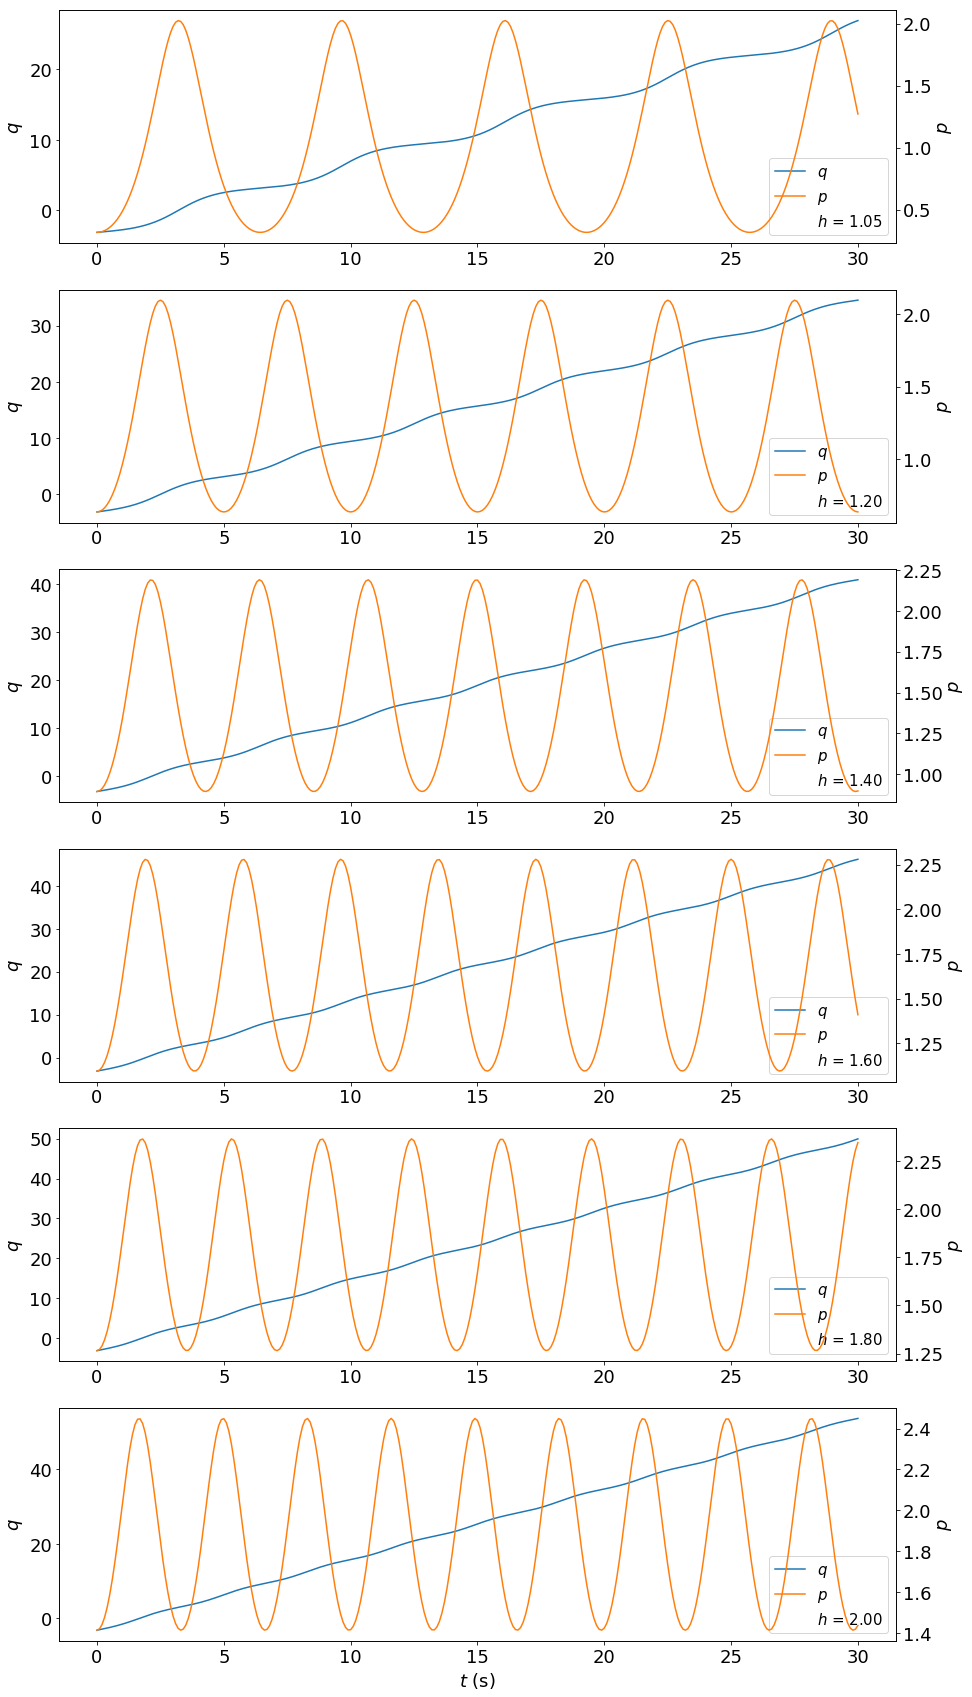

In [8]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(15,30))
for i, (energy, result) in enumerate(zip(energy_levels_over_1, results_over_1_pos)):
    t, y = result
    ax = fig.add_subplot(len(results_under_1), 1, i + 1)
    q_plot = ax.plot(t, y[0], label='$q$')
    ax2 = ax.twinx()
    p_plot = ax2.plot(t, y[1], label='$p$', color='C1')
    energy_label = ax2.plot([], [], ' ', label="$h$ = %.2f" % energy)
    
    
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='lower right', fontsize='small')
    
    ax.set_ylabel('$q$')
    ax2.set_ylabel('$p$')
    if i == len(results_over_1_pos) - 1:
        ax.set_xlabel('$t$ (s)')
fig.savefig('ex2_qp_plot_over1.png', bbox_inches='tight')

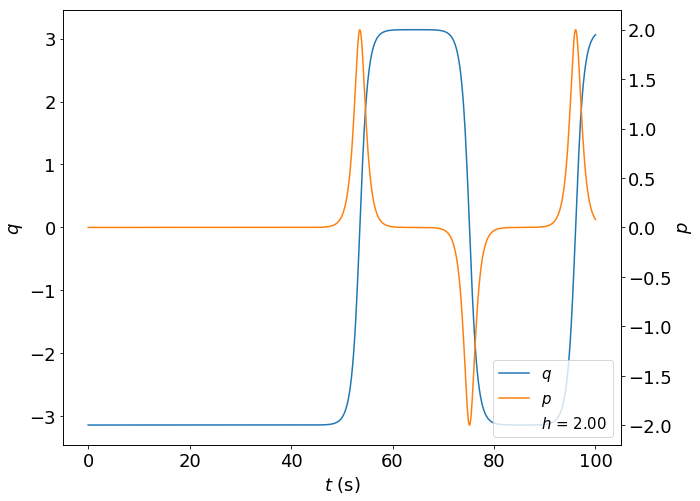

In [9]:
t_span = (0, 100)
res = sp_int.solve_ivp(hamiltonEquations, t_span, (-np.pi, 0), max_step = 0.1)
result_at_1 = (res.t, res.y)

fig = plt.figure(figsize=(10,8))
t, y = result_at_1
ax = fig.add_subplot(1, 1, 1)
q_plot = ax.plot(t, y[0], label='$q$')
ax2 = ax.twinx()
p_plot = ax2.plot(t, y[1], label='$p$', color='C1')
energy_label = ax2.plot([], [], ' ', label="$h$ = %.2f" % energy)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='lower right', fontsize='small')

ax.set_ylabel('$q$')
ax2.set_ylabel('$p$')
ax.set_xlabel('$t$ (s)')
fig.savefig('ex2_qp_plot_at1.png', bbox_inches='tight')

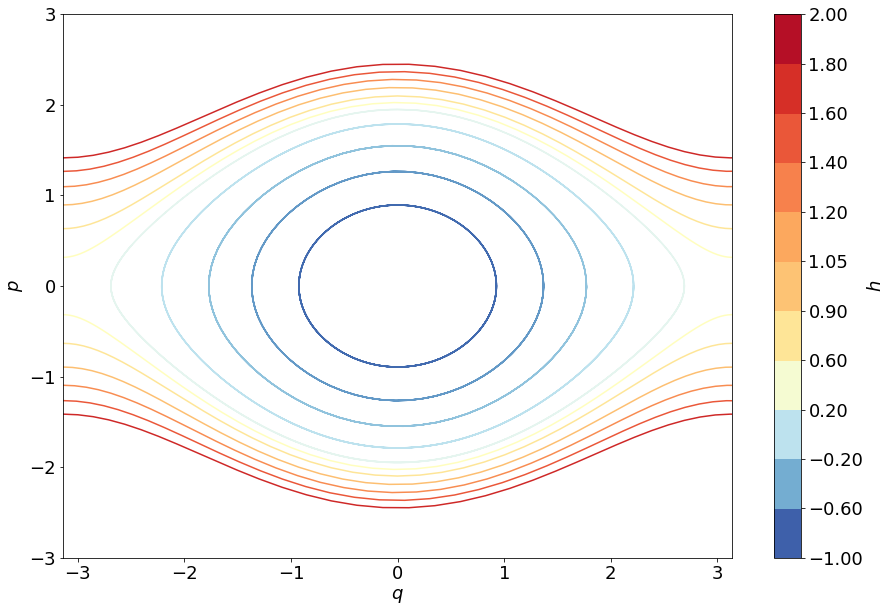

In [10]:
#DIAGRAMA DE FASES CON TRAYECTORIAS INTEGRADAS

n = len(results_under_1) + 1 + len(results_over_1_pos)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

cmap = plt.cm.RdYlBu_r
cm = cmap(np.linspace(0, 1, n))
cm_counter = 0
for i, (energy, result) in enumerate(zip(energy_levels_under_1, results_under_1)):
    t, y = result
    qs, ps = y
    ax.plot(qs, ps, color=cm[cm_counter], zorder=2)
    cm_counter += 1
cm_counter_bak = cm_counter
for i, (energy, result) in enumerate(zip(energy_levels_over_1, results_over_1_pos)):
    t, y = result
    qs, ps = y
    ax.plot(qs, ps, color=cm[cm_counter], zorder=2)
    cm_counter += 1
cm_counter = cm_counter_bak
for i, (energy, result) in enumerate(zip(energy_levels_over_1, results_over_1_neg)):
    t, y = result
    qs, ps = y
    ax.plot(qs, ps, color=cm[cm_counter], zorder=2)
    cm_counter += 1
    
ax.set_xlim(-np.pi, np.pi)


#HACK TO ADD AN INDEPENDENT COLORBAR:
q_space = np.linspace(-np.pi, np.pi, 1000)
p_space = np.linspace(-3, 3, 1000)
Q_space, P_space = np.meshgrid(q_space, p_space)
H = h(Q_space, P_space)
energy_levels = np.concatenate([energy_levels_under_1, energy_levels_over_1])
csf = ax.contourf(q_space, p_space, H, levels=energy_levels, cmap=plt.cm.RdYlBu_r, zorder=0)
cs = ax.contour(q_space, p_space, H, levels=energy_levels, zorder=0)
ax.add_patch(mpatches.Rectangle((ax.get_xlim()[0], ax.get_ylim()[0]), ax.get_xlim()[1] - ax.get_xlim()[0], \
                                ax.get_ylim()[1] - ax.get_ylim()[0], color='white', zorder=1))

cbar = fig.colorbar(csf)
cbar.ax.set_ylabel('$h$')
cbar.set_ticks(energy_levels)


ax.set_xlabel('$q$')
ax.set_ylabel('$p$')

fig.savefig('ex2_phase_plot.png', bbox_inches='tight')

# Exercise 3:

Let $\omega_r(h) = \sqrt{\frac{h + 1}{2}}$. Considering $V_0 = omega_0^2 = 1$, the angular frequencies for oscillations ($h < 1$) and rotations ($h > 1$) of a simple pendulum are given by
$$\omega_{osc}(h) = \frac{\pi}{2 K\left(\sqrt{\frac{h + 1}{2}}\right)},$$
and
$$\omega_{rot}(h) = \frac{\pi \omega_r(h)}{2 K\left(\sqrt{\frac{2}{h + 1}}\right)}$$
respectively, where $K(k)$ is the complete elliptic integral of the first kind:
$$K(k) = \int_0^{\pi/2} \frac{dt}{\sqrt{1 - k^2 \sin^2 t}}.$$

Note: SciPy uses Mathematica's convention on elliptic functions, replacing $k^2$ with a parameter $m$:
$$K_{SciPy}(m) = \int_0^{\pi/2} \frac{dt}{\sqrt{1 - m \sin^2 t}}.$$
As such $K(k) = K_{SciPy}(k^2)$.

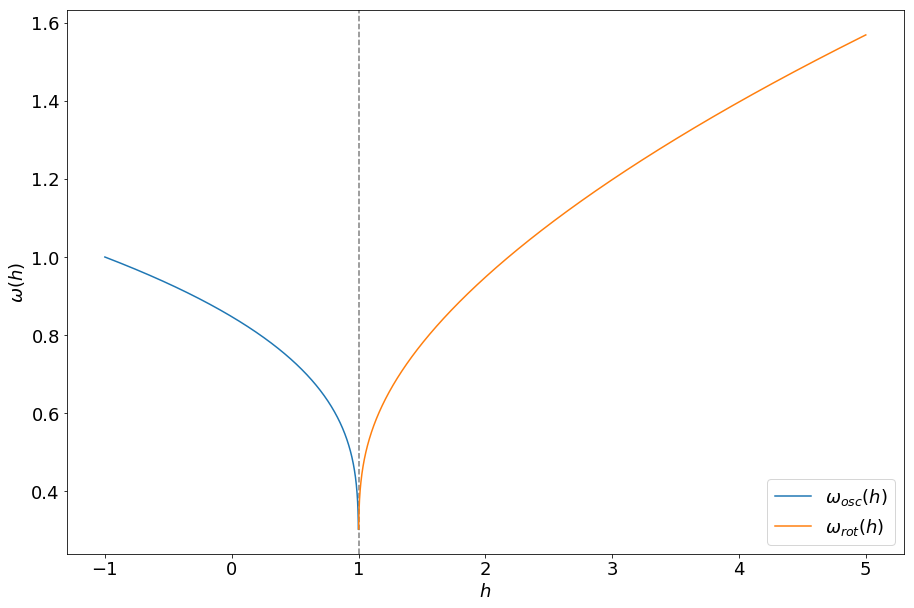

In [11]:
omega_r = lambda h: np.sqrt((h + 1)/2)
omega_osc = lambda h: np.pi / (2 * sp.special.ellipk(omega_r(h)**2))
omega_rot = lambda h: np.pi * omega_r(h) / (2 * sp.special.ellipk(omega_r(h)**(-2)))

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
h_lsp_under_1 = np.linspace(-1, 1, 2000)[:-1]
h_lsp_over_1 = np.linspace(1, 5, 4000)[1:]
ax.axvline(1, linestyle='--', color='gray')
ax.plot(h_lsp_under_1, omega_osc(h_lsp_under_1), label='$\\omega_{osc}(h)$')
ax.plot(h_lsp_over_1, omega_rot(h_lsp_over_1), label='$\\omega_{rot}(h)$')

ax.set_xlabel('$h$')
ax.set_ylabel('$\\omega(h)$')

ax.legend(loc='lower right')

fig.savefig('ex3_omega.png', bbox_inches='tight')

# Exercise 4 & 5

An asymptotical aproximation to $\omega(h)$ when $V_0 = \omega_0^2$ is given by
$$\omega(w) = \frac{\pi}{\ln \frac{32}{|w|}}, \quad |w| \ll 1,$$
where $w = h - 1$

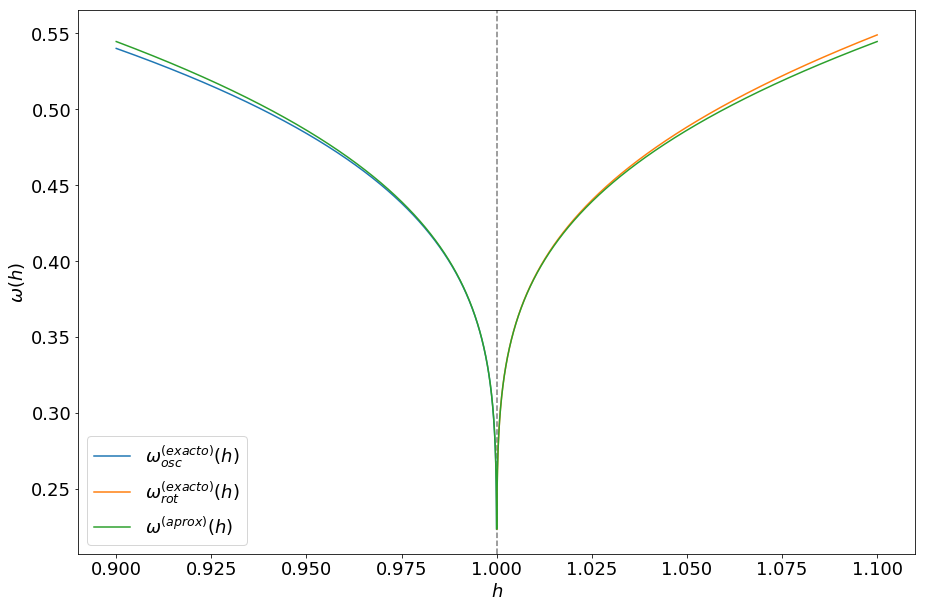

In [13]:
omega_r = lambda h: np.sqrt((h + 1)/2)
omega_osc = lambda h: np.pi / (2 * sp.special.ellipk(omega_r(h)**2))
omega_rot = lambda h: np.pi * omega_r(h) / (2 * sp.special.ellipk(omega_r(h)**(-2)))
omega_asymp = lambda h: np.pi / (np.log(32/abs(h - 1)))

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
h_lsp_under_1 = np.linspace(0.9, 1, 4000)[:-1]
h_lsp_over_1 = np.linspace(1, 1.1, 4000)[1:]
ax.axvline(1, linestyle='--', color='gray')
ax.plot(h_lsp_under_1, omega_osc(h_lsp_under_1), label='$\\omega^{(exacto)}_{osc}(h)$')
ax.plot(h_lsp_over_1, omega_rot(h_lsp_over_1), label='$\\omega^{(exacto)}_{rot}(h)$')
ax.plot(np.concatenate([h_lsp_under_1, h_lsp_over_1]), omega_asymp(np.concatenate([h_lsp_under_1, h_lsp_over_1])), label='$\\omega^{(aprox)}(h)$')

ax.set_xlabel('$h$')
ax.set_ylabel('$\\omega(h)$')

ax.legend(loc='lower left')

fig.savefig('ex4-5_omega.png', bbox_inches='tight')

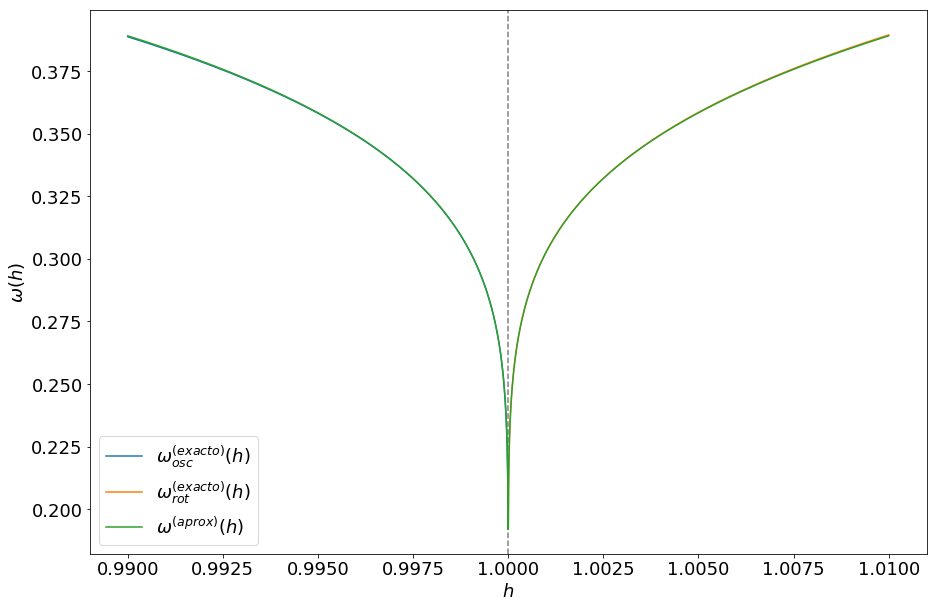

In [16]:
omega_r = lambda h: np.sqrt((h + 1)/2)
omega_osc = lambda h: np.pi / (2 * sp.special.ellipk(omega_r(h)**2))
omega_rot = lambda h: np.pi * omega_r(h) / (2 * sp.special.ellipk(omega_r(h)**(-2)))
omega_asymp = lambda h: np.pi / (np.log(32/abs(h - 1)))

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
h_lsp_under_1 = np.linspace(0.99, 1, 4000)[:-1]
h_lsp_over_1 = np.linspace(1, 1.01, 4000)[1:]
ax.axvline(1, linestyle='--', color='gray')
ax.plot(h_lsp_under_1, omega_osc(h_lsp_under_1), label='$\\omega^{(exacto)}_{osc}(h)$')
ax.plot(h_lsp_over_1, omega_rot(h_lsp_over_1), label='$\\omega^{(exacto)}_{rot}(h)$')
ax.plot(np.concatenate([h_lsp_under_1, h_lsp_over_1]), omega_asymp(np.concatenate([h_lsp_under_1, h_lsp_over_1])), label='$\\omega^{(aprox)}(h)$')

ax.set_xlabel('$h$')
ax.set_ylabel('$\\omega(h)$')

ax.legend(loc='lower left')

fig.savefig('ex4-5_omega_zoom.png', bbox_inches='tight')